#**Support Vector Machines**
<font color='grey' size='1.5'> Created by Parisa Hosseinzadeh for *Machine learning for proteins*, Spring 2022. 

Today, we will work on building different SVM models. The examples and codes for this assignment are adapted from [Marco Peixeiro's guide to SVM](https://towardsdatascience.com/the-complete-guide-to-support-vector-machine-svm-f1a820d8af0b).

## Preparing for the run

### Importing necessary modules

In [ ]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from scipy.io import loadmat

%matplotlib inline

### Setting paths to data types

Here you can define paths to where the data files are at.

In [ ]:
DATAPATH_1 = ('ex6data1.mat')
DATAPATH_2 = ('ex6data2.mat')
DATAPATH_3 = ('ex6data3.mat')
DATA_SPAM_TRAIN = ('spamTrain.mat')
DATA_SPAM_TEST = ('spamTest.mat')

### Defining a plotting function

Feel free to adjust this plotting function if you'd like to change your plot settings.

In [ ]:
def plot_data(X, y, xlabel, ylabel, pos_label, neg_label, xmin, xmax, ymin, ymax, axes=None):

  plt.rcParams['figure.figsize'] = (10., 7.)

  pos = y[:, 0] == 1
  neg = y[:, 0] == 0

  if axes == None:
    axes = plt.gca()

  axes.scatter(X[pos][:,0], X[pos][:,1], marker='o', c='#003f5c', s=100, linewidth=2, label=pos_label)
  axes.scatter(X[neg][:,0], X[neg][:,1], marker='d', c='#ffa600', s=100, linewidth=2, label=neg_label)

  axes.set_xlim([xmin, xmax])
  axes.set_ylim([ymin, ymax])

  axes.set_xlabel(xlabel, fontsize=12)
  axes.set_ylabel(ylabel, fontsize=12)

  axes.legend(bbox_to_anchor=(1,1), fancybox=True)

## SVM with linear kernel

Let's try to work on a simple case of SVM where you are simply drawing a line to separate two classes.

### Loading the model and visualization

In [ ]:
# loading dataset 1
data1 = loadmat(DATAPATH_1)

# defining X and y parameters
# Note: if you're interested in seeing how the data is arranged
# you can type data.head()
X = data1['X']
y = data1['y']

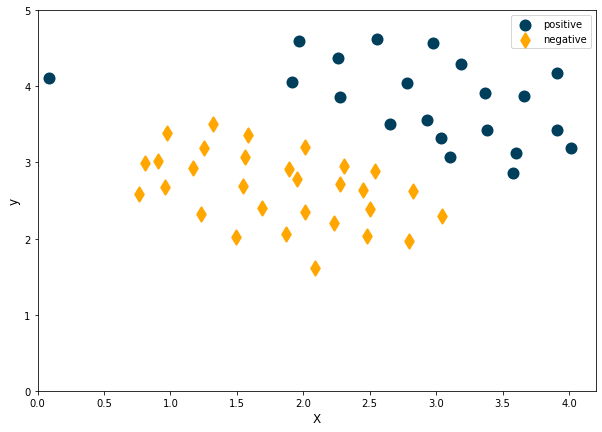

In [ ]:
# plotting the data
plot_data(X, y, 'X', 'y', 'positive', 'negative', 0, 4.2, 0, 5)

### Q1. Time to exercise

If you were to draw a line to separate these groups, would you consider the blue circle on the top right corner? Why or why not?

### Running SVM

We will use [scikit's svm](https://scikit-learn.org/stable/modules/svm.html) and in particular [SVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC) to perform our fit. Fill in the parts marked by **##** below.


For this exercise, we will be using a **'linear'** `kernerl`. Our parameter `C` (which is inversely correlated with the strength of the regularization)will be set to **1.0** and the `decision_function_shape` will be set to **'ovr'**. 'ovr' means one-vs-rest. It iss designed to model each class against all of the other classes independently, and create a classifier for each situation. OneVsRestClassifier grabs a class, and creates a binary label for whether a point is or isn't that class. Then this labelling gets fed into whatever estimator you have chosen to use.

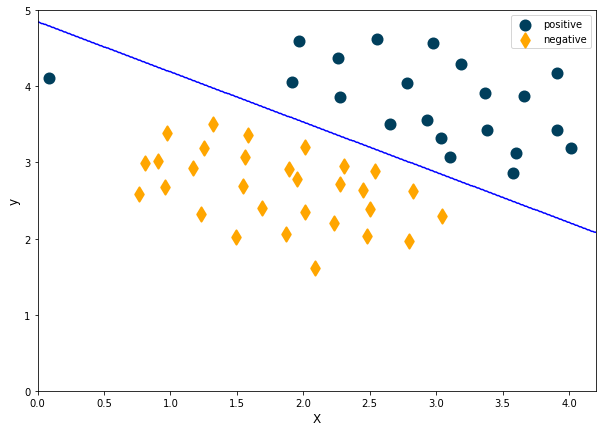

In [ ]:
from sklearn import svm

## complete the SVC set below based on the descriptions above.
clf = svm.SVC(kernel= 'linear', ## add kernel
              C= 1.0, ## add C 
              decision_function_shape = 'ovr') ## add decision function
clf.fit(X, y.ravel())

#plot data
plot_data(X, y, 'X', 'y', 'positive', 'negative', 0, 4.2, 0, 5)

#plot hyperplane
x_1, x_2 = np.meshgrid(np.arange(0.0, 5.0, 0.01), np.arange(0.0, 5.0, 0.01))
Z = clf.predict(np.c_[x_1.ravel(), x_2.ravel()])
Z = Z.reshape(x_1.shape)
plt.contour(x_1, x_2, Z, [0.5], colors='b')

In [ ]:
# let's check the accuracy of this model
clf.score(X,y)

### Q2. Time to exercis

Let's keep everything else the same but define C to be 100. How does the accuracy check? What does that tell you?

How do you compare the plots?

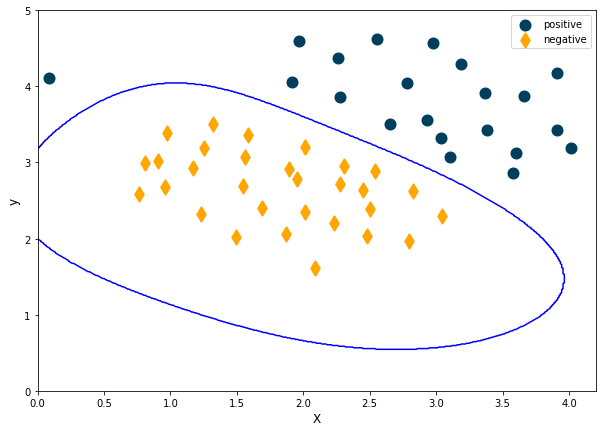

In [ ]:
## complete the missing parts in () and use C=100
clf100 = svm.SVC() ## fill in here
clf100.fit(X, y.ravel())

#Plot data
plot_data(X, y, 'X', 'y', 'positive', 'negative', 0, 4.2, 0, 5)

#Plot hyperplane

x_1, x_2 = np.meshgrid(np.arange(0.0, 5.0, 0.01), np.arange(0.0, 5.0, 0.01))
Z = clf100.predict(np.c_[x_1.ravel(), x_2.ravel()])
Z = Z.reshape(x_1.shape)
plt.contour(x_1, x_2, Z, [0.5], colors='b')

In [ ]:
## check accuracy for clf100 same as we did before for clf


## Non-linear SVM with Gaussian Kernel

Now, let's try to work with a dataset that is non-linear and try to see how using a different kernel can help. *Gaussian Kernel* or *RBF* (for Radial Basis Function) is one of the popular kernels used in SVM. This kernel has a  parameter called *gamma*. Technically, the gamma parameter is the inverse of the standard deviation of the RBF kernel (Gaussian function), which is used as similarity measure between two points. Intuitively, a small gamma value define a Gaussian function with a large variance. In this case, two points can be considered similar even if are far from each other. In the other hand, a large gamma value means define a Gaussian function with a small variance and in this case, two points are considered similar just if they are close to each other.

Let's take a look and see how it works (example adapted from [this page](https://www.guru99.com/kernel-methods-machine-learning.html))

In [ ]:
#@title Loading and visualizing test set

x = np.array([1,1,2,3,3,6,6,6,9,9,10,11,12,13,16,18])
y = np.array([18,13,9,6,15,11,6,3,5,2,10,5,6,1,3,1])
label = np.array([1,1,1,1,0,0,0,1,0,1,0,0,0,1,0,1])
fig = plt.figure()
plt.scatter(x, y, c=label, s=100)
plt.show()

In [ ]:
#@title Transformation and visualization

# illustration purpose
def mapping(x, y):    
  x = np.c_[(x, y)]				
  if len(x) >	2:        
    x_1 = x[:,0]**2        
    x_2 = np.sqrt(2)*x[:,0]*x[:,1]        
    x_3 = x[:,1]**2								
  else:            
    x_1 = x[0]**2        
    x_2 = np.sqrt(2)*x[0]*x[1]        
    x_3 = x[1]**2			    
   
  trans_x = np.array([x_1, x_2, x_3])				
  return trans_x

x_1  = mapping(x, y)

# plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x_1[0], x_1[1], x_1[2], c=label, s=100)
ax.view_init(30, 185)
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
plt.show()

In [ ]:
#@title Another view of the transformed data

# plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x_1[0], x_1[1], x_1[1], c=label, s=60)
ax.view_init(0, -180)
ax.set_ylim([150,-50])
ax.set_zlim([-10000,10000])
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
plt.show()

### Loading and visualizing the data

Now let's look at a case where we can use SVM with Gaussian kernel for separation of classes.

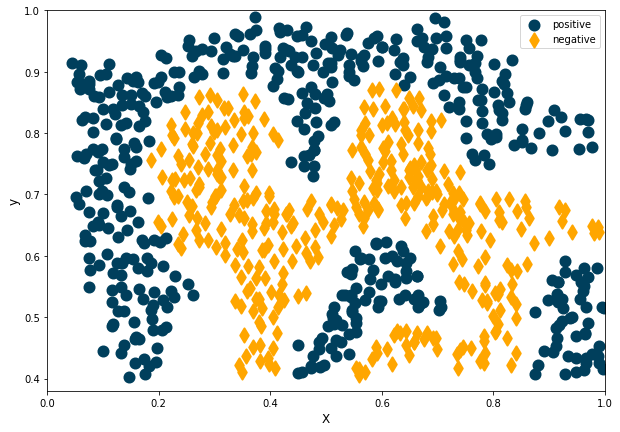

In [ ]:
data2 = loadmat(DATAPATH_2)

X_2 = data2['X']
y_2 = data2['y']

plot_data(X_2, y_2, 'X', 'y', 'positive', 'negative', 0, 1.0, 0.38, 1)

### Running SVM

In this case, define kernel as 'rbf'. As you can see, we have defined gamma as the inverse of sigma, where sigma is 1.

Fill in the code where **##** is shown.

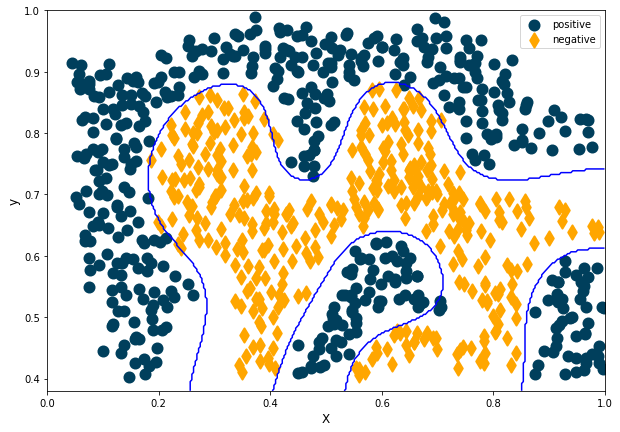

In [ ]:
sigma = 0.1
gamma = 1/(2 * sigma**2)

## Define kernel to be 'rbf'
clfg = svm.SVC(kernel= 'rbf', ## add here
               gamma=gamma, C=1.0, decision_function_shape='ovr')
clfg.fit(X_2, y_2.ravel())

plot_data(X_2, y_2, 'X', 'y', 'positive', 'negative', 0, 1, 0.38, 1)

x_1, x_2 = np.meshgrid(np.arange(0.0, 1.0, 0.003), np.arange(0.38, 1.0, 0.003))
Z = clfg.predict(np.c_[x_1.ravel(), x_2.ravel()])
Z = Z.reshape(x_1.shape)
plt.contour(x_1, x_2, Z, [0.5], colors='b')

### Q3. Time to exercise

Run the same code but change the following parameters (one at a time) and see how it affects the fit:
1. value of gamma (try sigma = 1 and sigma = 0.01)
2. C (try 100 and 0.1)

In [ ]:
# code goes here

## Automating the search for best parameters

As you saw in the previous exercise, the values of gamma and C are very important for the best result. Let's see how we can automate this by trying the code below running a gaussian kernel on a test set.

### Loading and visualizing the data

In [ ]:
data3 = loadmat(DATAPATH_3)

X_3 = data3['X']
y_3 = data3['y']

plot_data(X_3, y_3, 'X', 'y', 'positive', 'negative', -0.55, 0.35, -0.8, 0.6)

### Looping over values

The code cell below provides some guesses for the two parameters of interest. The range you see here is a common used.

Write the for loop below where **##** signs guide you.

In [ ]:
# defining ranges
sigma = [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30]
C = [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30]

# creating empty holders for accuracies and pairs
accuracies = list()
sigma_c = list()

## for loop in sigma (call the variable that iteractes each)
    ## for loop in C (call each_c)
        # perfprms svm given values
        clf = svm.SVC(kernel='rbf', gamma = 1/(2*(each**2)), C=each_c, decision_function_shape='ovr')
        # fits
        clf.fit(X_3, y_3.ravel())
        # get the accuracies and pairs
        accuracies.append(clf.score(data3['Xval'], data3['yval'].ravel()))
        sigma_c.append((each, each_c))

### Q4. Time to exercise

Find the pair in sigma_c with the maximum value of accuracies.

What is the best accuracy? What is the best pair of sigma and C?

In [ ]:
# Try to write the code yourself
# One way to calculate is provided below.

In [ ]:
#@title Sample response
#@markdown You can click on **show code** to see the sample answer.

# best model is the one with highest accuracy
index = np.argmax(accuracies)

# finding the best pair
sigma_max, c_max = sigma_c[index]

print('The optimal value of sigma is: {}'.format(sigma_max))
print('The optimal value of C is: {}'.format(c_max))

### Time to exercise

Add your sigma and C below to see the fit.

In [ ]:
sigma= ## your sigma
gamma = 1/(2*(sigma**2))

optimal_clf = svm.SVC(kernel='rbf', gamma=gamma, 
                      C= , ## your C
                      decision_function_shape='ovr')
optimal_clf.fit(X_3, y_3.ravel())

plot_data(X_3, y_3, 'X', 'y', 'positive', 'negative', -0.55, 0.35, -0.8, 0.6)

x_1, x_2 = np.meshgrid(np.arange(-0.6, 0.4, 0.004), np.arange(-0.8, 0.6, 0.004))
Z = optimal_clf.predict(np.c_[x_1.ravel(), x_2.ravel()])
Z = Z.reshape(x_1.shape)
plt.contour(x_1, x_2, Z, [0.5], colors='b')

## Putting it all together

Write a SVM Kernel on the spam_train data set and find its accuracy.

### Loading data

In [ ]:
# loading dataset
spam_train = loadmat(DATA_SPAM_TRAIN)
spam_test = loadmat(DATA_SPAM_TEST)

# define test and train X and Y
X_train = spam_train['X']
y_train = spam_train['y']

X_test = spam_test['Xtest']
y_test = spam_test['ytest']

### Q5. Time to exercise


Try a number of different parameters.

What is the model that gave you best results?
What is your test accuracy using that model?

In [ ]:
## writing svm
kerns = ['linear']
C = [0.1]
for k in kerns:
  print(k)
  for c in C:
    print(c)
    clf_spam = svm.SVC(kernel = k, ## Try 'linear', 'rbf' and 'poly' which is polynomial
                   C = c , ## Try different C (0.1, 1, 0.01)
                   decision_function_shape = 'ovr')
    # perform fitting
    clf_spam.fit(X_train, y_train.ravel())

    # calcualting accuracies on training set
    train_acc = clf_spam.score(spam_train['X'], spam_train['y'].ravel())
    print(f'Training accuracy = {train_acc * 100}')


linear
0.1
Training accuracy = 99.825


In [ ]:
## calculate accuracies on the test set
test_acc = clf_spam.score(X_test, y_test.ravel())
print(f'Test accuracy = {test_acc * 100}')